In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# SGD
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='relu', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))
mlp_sgd.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('SGD 정확률=', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)

# Adam
mlp_adam= Sequential()
mlp_adam.add(Dense(units=512, activation="relu", input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation="softmax"))
mlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam = mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('Adam 정확률=', mlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50


/opt/anaconda3/envs/cv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 1s - 1ms/step - accuracy: 0.3036 - loss: 2.1251 - val_accuracy: 0.5683 - val_loss: 1.8914
Epoch 2/50
469/469 - 1s - 1ms/step - accuracy: 0.6626 - loss: 1.7186 - val_accuracy: 0.7327 - val_loss: 1.5314
Epoch 3/50
469/469 - 1s - 1ms/step - accuracy: 0.7535 - loss: 1.4081 - val_accuracy: 0.7873 - val_loss: 1.2583
Epoch 4/50
469/469 - 1s - 1ms/step - accuracy: 0.7936 - loss: 1.1776 - val_accuracy: 0.8123 - val_loss: 1.0607
Epoch 5/50
469/469 - 1s - 1ms/step - accuracy: 0.8156 - loss: 1.0118 - val_accuracy: 0.8279 - val_loss: 0.9198
Epoch 6/50
469/469 - 1s - 1ms/step - accuracy: 0.8289 - loss: 0.8923 - val_accuracy: 0.8392 - val_loss: 0.8178
Epoch 7/50
469/469 - 1s - 1ms/step - accuracy: 0.8385 - loss: 0.8042 - val_accuracy: 0.8483 - val_loss: 0.7420
Epoch 8/50
469/469 - 1s - 1ms/step - accuracy: 0.8454 - loss: 0.7376 - val_accuracy: 0.8582 - val_loss: 0.6841
Epoch 9/50
469/469 - 1s - 1ms/step - accuracy: 0.8511 - loss: 0.6858 - val_accuracy: 0.8635 - val_loss: 0.6385
Epoch 10/50


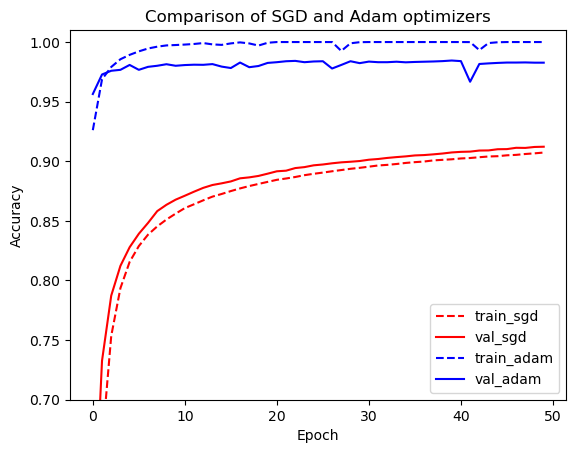

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.01))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.savefig('comparison of sgd and adam optimizers.png')